In [ ]:
import sys
sys.path.append("../src")  

# Calling the preprocessing function
from preprocessing import prepare_ml_data

In [6]:
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

In [ ]:
# Both XGBoost and SVM require 2D input data, so we will flatten the images.
X, y = prepare_ml_data("../data_sample", target_size=(64, 64))

Split into two training and two testing datasets. Save in data -> processed.

In [ ]:
import os
import numpy as np

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


#save_dir = "../data/processed"
#os.makedirs(save_dir, exist_ok=True)

#np.save(os.path.join(save_dir, "X_train.npy"), X_train)
#np.save(os.path.join(save_dir, "X_test.npy"), X_test)
#np.save(os.path.join(save_dir, "y_train.npy"), y_train)
#np.save(os.path.join(save_dir, "y_test.npy"), y_test)

In [ ]:
# Dimensions of the datasets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (16, 12288) (16,)
Testing set: (4, 12288) (4,)


In [13]:
# Training an XGBoost classifier

# Doesn't naturally capture spatial patterns (edges, textures, shapes) like CNNs do
# Thus, baseline model against CNNs

xgb_model = XGBClassifier(
    n_estimators=100,     # number of boosted trees
    max_depth=5,          # tree depth (controls complexity)
    learning_rate=0.1,    # boosting shrinkage
    subsample=0.8,        # use 80% of samples per tree
    colsample_bytree=0.8, # use 80% of features per tree
    eval_metric="logloss" # required to suppress warnings for binary classification
)

xgb_model.fit(X_train, y_train)

# Predictions on test set
y_pred_xgb = xgb_model.predict(X_test) 

# Evaluate accuracy
xgb_acc = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Test Accuracy: {xgb_acc:.4f}")

XGBoost Test Accuracy: 0.7500


In [14]:
#Train a SVM model

# SVM finds the best hyperplane that separates the two classes (cat vs dog).
# A linear kernel is fast and is commonly used as a baseline model.

svm_model = SVC(kernel="linear") # or kernel="rbf" for nonlinear relationships - slower computation
svm_model.fit(X_train, y_train) 
y_pred_svm = svm_model.predict(X_test) 
print("SVM accuracy:", accuracy_score(y_test, y_pred_svm))

SVM accuracy: 0.5


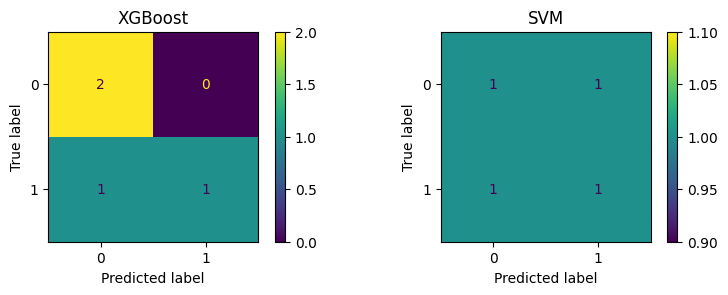

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(8, 3))   # smaller width & height

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[0])
axes[0].set_title("XGBoost")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, ax=axes[1])
axes[1].set_title("SVM")

plt.tight_layout()
plt.show()
